# Monogenic functions step by step
## Ulises Moya, Sebastian Salazar Colores, Sebastián Xambó, Abraham Sánchez, and Ulises Cortés 
### March 2019

---

The main goal of this  notebook is  explain step by step the monogenic m6 computation. The main function is `monogenic_functions`

In [1]:
import keras
from keras.datasets import cifar10
import numpy as np
import cv2
import matplotlib.pyplot as plt
import monogenic_functions as mf
from pyfftw.interfaces.scipy_fftpack import fft2, ifft2
from sklearn.preprocessing import minmax_scale

Using TensorFlow backend.


Loading a 3 channels image

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

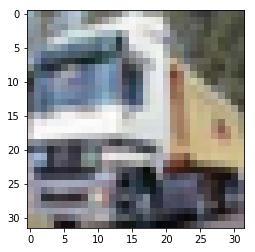

In [3]:
plt.imshow(x_train[1])

In [4]:
#rows, cols, chann = x_train[0].shape
img=x_train[1]
# float point is very important in order to compute the fft2
if img.dtype not in ['float32', 'float64']:
    img = np.float64(img)
    imgdtype = 'float64'
else:
    imgdtype = img.dtype
# for 3 channel we  make one channel computing the mean value
if img.ndim == 3:  # hay que cambiar esto
    img = img.mean(2)
rows, cols = img.shape

The  python function

```
monogenic_scale(cols=cols,rows=rows, ss=ss,  minWaveLength=mw, mult=mlt, sigmaOnf=sig)
```
computes the monnogenic filters `logGabor, logGabor_H1, logGabor_H2` at scale ss, in $frequency$ $domain$ using the  you can see more retail of this function in `monogenic_functions.py`. The input parameters of the monogenic scale function are

**Input**

ss, Scale
mw, Minimun wavelet
mlt, Multiplicator between each scale
sig, Sigma (size of the Log-Gabor)

**Output**

3 filters in freq domian  `logGabor, logGabor_H1, logGabor_H2` 

In [5]:
logGabor, logGabor_H1, logGabor_H2 = mf.monogenic_scale(cols=cols,
                                                        rows=rows,
                                                        ss=1, 
                                                        minWaveLength=2,
                                                        mult=2,
                                                        sigmaOnf=0.3)

It is possible to see the geometric relation of the  frequency  domian components of `logGabor, logGabor_H1, logGabor_H2`  in 3D space (quadrature filters) if we  put,  elements from `logGabor` at $z-axis$,  `logGabor_H1` at $x-axis$ and  `logGabor_H2`   $y-axis$. 

In [6]:
# Compute the FFT2D in the corner
IM = fft2(img)  # Discrete Fourier Transform of image
IMF = IM * logGabor   # Frequency bandpassed image
# Bandpassed monogenic filtering in frequency space, real part of h contains
IMH1=IM*logGabor_H1
IMH2=IM*logGabor_H2

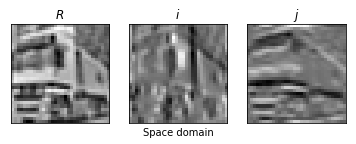

In [7]:
plt.subplot(131),plt.imshow(np.real(ifft2(IMF)), cmap = 'gray')
plt.title('$R$'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(np.real(ifft2(IMH1)), cmap = 'gray')
plt.title('$i$'), plt.xticks([]), plt.yticks([])
plt.xlabel('Space domain')
plt.subplot(133),plt.imshow(np.real(ifft2(IMH2)), cmap = 'gray')
plt.title('$j$'), plt.xticks([]), plt.yticks([])
plt.show()

In [8]:
# Spatially bandpassed image
f = np.real(ifft2(IMF))  
h1= np.real(ifft2(IMH1))
h2= np.real(ifft2(IMH2))

In [9]:
#Compute the geometric components
# Amplitude of this scale component
an = np.sqrt(f * f + h1 * h1 + h2 * h2)
# Final computation of key quantities
ori = np.arctan(-h2 / h1)
# Wrap angles between -pi and pi and convert radians to degrees
ori_d = np.fix((ori % np.pi) / np.pi * 180.)
# Feature type (a phase angle between -pi/2 and pi/2)
ft = np.arctan2(f, np.sqrt(h1 * h1 + h2 * h2))
#proyection on ij plane
fr= np.sqrt(h1 * h1 + h2 * h2)

In [10]:
oris = np.floor(minmax_scale(ori)*179).astype('uint8')
fts = np.floor(minmax_scale(ft)*179).astype('uint8')
frs = np.floor(minmax_scale(fr)*255).astype('uint8')
ones = (np.ones((img.shape))*255).astype('uint8')

In [11]:
hsvimg = cv2.merge((fts, frs, ones))
bgrimg = cv2.cvtColor(hsvimg, cv2.COLOR_HSV2BGR)
rgbimg = cv2.cvtColor(bgrimg, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(rgbimg)

hsvimg2 = cv2.merge((oris, frs, ones))
bgrimg2 = cv2.cvtColor(hsvimg2, cv2.COLOR_HSV2BGR)
rgbimg2 = cv2.cvtColor(bgrimg2, cv2.COLOR_BGR2RGB)
r2, g2, b2 = cv2.split(rgbimg2)

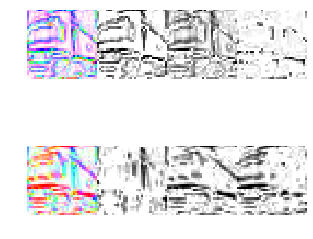

In [12]:
#Display each componenent in RGB color space
fig, ax = plt.subplots(2,4,figsize=(5, 5))
[axi.set_axis_off() for axi in ax.ravel()]
ax[0,0].imshow(rgbimg, cmap = 'gray') 
ax[0,1].imshow(r, cmap = 'gray')   
ax[0,2].imshow(g, cmap = 'gray')  
ax[0,3].imshow(b, cmap = 'gray')  
ax[1,0].imshow(rgbimg2, cmap = 'gray') #image
ax[1,1].imshow(r2, cmap = 'gray')      #filterimage
ax[1,2].imshow(g2, cmap = 'gray')  
ax[1,3].imshow(b2, cmap = 'gray')  
plt.subplots_adjust(wspace=0.01, hspace=0)
plt.show()